# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
# Define the path to the data files
path = '/Users/lamarosavio/Documents/A6_FInal'

In [8]:
# Import Data
df_gundeaths = pd.read_csv(os.path.join(path, '/Users/lamarosavio/Documents/A6_FInal /02 Data/Remade_A6_Final.csv'))

# Data Cleaning

In [11]:
df_gundeaths.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'n_killed',
       'n_injured', 'congressional_district', 'incident_characteristics',
       'latitude', 'longitude', 'n_guns_involved', 'participant_age',
       'participant_age_group', 'participant_gender', 'state_house_district',
       'state_senate_district', 'incident_characteristics_cleaned'],
      dtype='object')

In [13]:
df_gundeaths.head(20)

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,state_house_district,state_senate_district,incident_characteristics_cleaned
0,461105,01-01-2013,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,NaN,Shot - Wounded/Injured; Mass Shooting (4+ vict...
1,460726,01-01-2013,California,Hawthorne,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,62.0,35.0,"Shot - Wounded/Injured; Shot - Dead (murder, a..."
2,478855,01-01-2013,Ohio,Lorain,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,56.0,13.0,"Shot - Wounded/Injured; Shot - Dead (murder, a..."
3,478925,05-01-2013,Colorado,Aurora,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,40.0,28.0,"Shot - Dead (murder, accidental, suicide); Off..."
4,478959,07-01-2013,North Carolina,Greensboro,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,62.0,27.0,"Shot - Wounded/Injured; Shot - Dead (murder, a..."
5,478948,07-01-2013,Oklahoma,Tulsa,4,0,1.0,"Shot - Dead (murder, accidental, suicide)||Hom...",36.2405,-95.9768,NaN,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,72.0,11.0,"Shot - Dead (murder, accidental, suicide); Hom..."
6,479363,19-01-2013,New Mexico,Albuquerque,5,0,1.0,"Shot - Dead (murder, accidental, suicide)||Mas...",34.9791,-106.7160,2.0,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,10.0,14.0,"Shot - Dead (murder, accidental, suicide); Mas..."
7,479374,21-01-2013,Louisiana,New Orleans,0,5,2.0,Shot - Wounded/Injured||Drive-by (car to stree...,29.9435,-90.0836,NaN,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,93.0,5.0,Shot - Wounded/Injured; Drive-by (car to stree...
8,479389,21-01-2013,California,Brentwood,0,4,9.0,Shot - Wounded/Injured||Drive-by (car to stree...,37.9656,-121.7180,NaN,NaN,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,11.0,7.0,Shot - Wounded/Injured; Drive-by (car to stree...
9,492151,23-01-2013,Maryland,Baltimore,1,6,7.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",39.2899,-76.6412,NaN,0::15,0::Teen 12-17||1::Adult 18+||2::Adult 18+||3::...,0::Male,NaN,44.0,"Shot - Wounded/Injured; Shot - Dead (murder, a..."


In [15]:
df_gundeaths.shape

(239677, 17)

In [25]:
# Clean column 'Number of guns involved' column

# Display the initial summary of the 'n_guns_involved' column
print("Before Imputation:")
print(df_gundeaths['n_guns_involved'].describe())
print(f"Number of missing values: {df_gundeaths['n_guns_involved'].isna().sum()}")

# Impute missing values in 'n_guns_involved' with the column's mean
mean_value = df_gundeaths['n_guns_involved'].mean()
df_gundeaths['n_guns_involved'].fillna(mean_value, inplace=True)


Before Imputation:
count    140226.000000
mean          1.372442
std           4.678202
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         400.000000
Name: n_guns_involved, dtype: float64
Number of missing values: 99451


/var/folders/ds/h59p98rj03vcsx4p3mkf6__80000gn/T/ipykernel_46348/3884218718.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_gundeaths['n_guns_involved'].fillna(mean_value, inplace=True)


In [27]:
df_gundeaths.head(20)

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,state_house_district,state_senate_district,incident_characteristics_cleaned
0,461105,01-01-2013,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,1.372442,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,NaN,Shot - Wounded/Injured; Mass Shooting (4+ vict...
1,460726,01-01-2013,California,Hawthorne,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,1.372442,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,62.0,35.0,"Shot - Wounded/Injured; Shot - Dead (murder, a..."
2,478855,01-01-2013,Ohio,Lorain,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,2.000000,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,56.0,13.0,"Shot - Wounded/Injured; Shot - Dead (murder, a..."
3,478925,05-01-2013,Colorado,Aurora,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,1.372442,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,40.0,28.0,"Shot - Dead (murder, accidental, suicide); Off..."
4,478959,07-01-2013,North Carolina,Greensboro,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,2.000000,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,62.0,27.0,"Shot - Wounded/Injured; Shot - Dead (murder, a..."
5,478948,07-01-2013,Oklahoma,Tulsa,4,0,1.0,"Shot - Dead (murder, accidental, suicide)||Hom...",36.2405,-95.9768,1.372442,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,72.0,11.0,"Shot - Dead (murder, accidental, suicide); Hom..."
6,479363,19-01-2013,New Mexico,Albuquerque,5,0,1.0,"Shot - Dead (murder, accidental, suicide)||Mas...",34.9791,-106.7160,2.000000,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,10.0,14.0,"Shot - Dead (murder, accidental, suicide); Mas..."
7,479374,21-01-2013,Louisiana,New Orleans,0,5,2.0,Shot - Wounded/Injured||Drive-by (car to stree...,29.9435,-90.0836,1.372442,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,93.0,5.0,Shot - Wounded/Injured; Drive-by (car to stree...
8,479389,21-01-2013,California,Brentwood,0,4,9.0,Shot - Wounded/Injured||Drive-by (car to stree...,37.9656,-121.7180,1.372442,NaN,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,11.0,7.0,Shot - Wounded/Injured; Drive-by (car to stree...
9,492151,23-01-2013,Maryland,Baltimore,1,6,7.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",39.2899,-76.6412,1.372442,0::15,0::Teen 12-17||1::Adult 18+||2::Adult 18+||3::...,0::Male,NaN,44.0,"Shot - Wounded/Injured; Shot - Dead (murder, a..."


# Data Prep for Regression Analysis

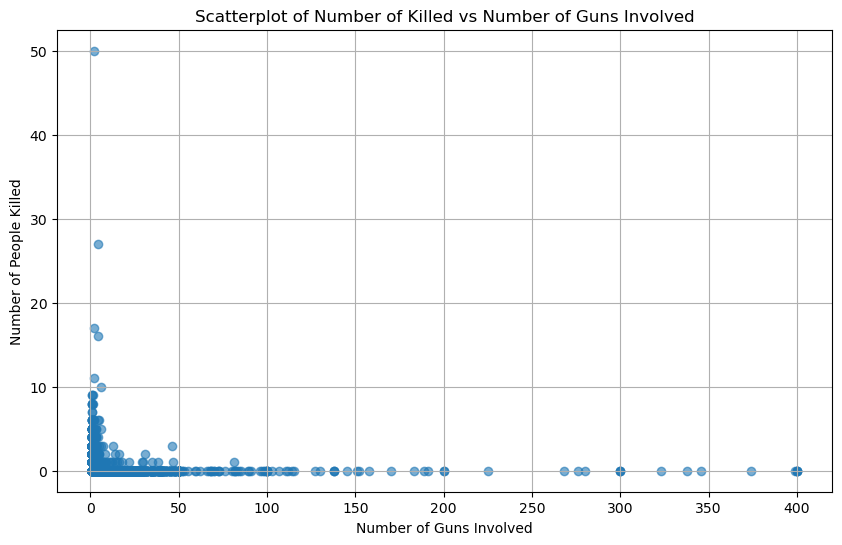

In [34]:
# Scatterplot for relationship between 'n_killed' vs. 'n_guns_involved'
plt.figure(figsize=(10, 6))
plt.scatter(df_gundeaths['n_guns_involved'], df_gundeaths['n_killed'], alpha=0.6)
plt.title('Scatterplot of Number of Killed vs Number of Guns Involved')
plt.xlabel('Number of Guns Involved')
plt.ylabel('Number of People Killed')
plt.grid(True)
plt.show()

# Determine whether the number of guns involved predict the number of people killed
# Hypothesis: The number of guns involved in the incident do not affect the number of people killed 

/var/folders/ds/h59p98rj03vcsx4p3mkf6__80000gn/T/ipykernel_46348/3406301270.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gundeaths['n_guns_involved'], bins=25) # Shows extreme values


<Axes: xlabel='n_guns_involved', ylabel='Density'>

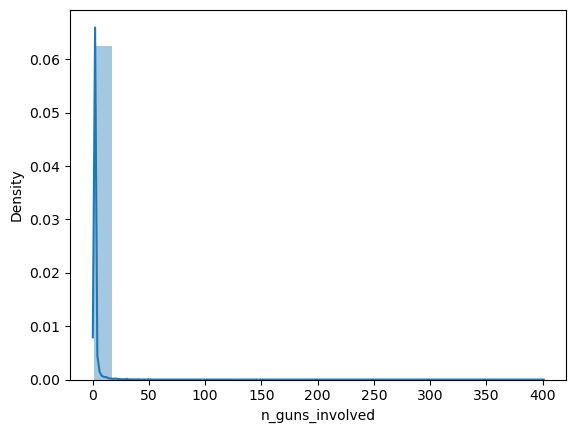

In [48]:
sns.distplot(df_gundeaths['n_guns_involved'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

/var/folders/ds/h59p98rj03vcsx4p3mkf6__80000gn/T/ipykernel_46348/4099133647.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gundeaths['n_killed'], bins=25) # Shows extreme values


<Axes: xlabel='n_killed', ylabel='Density'>

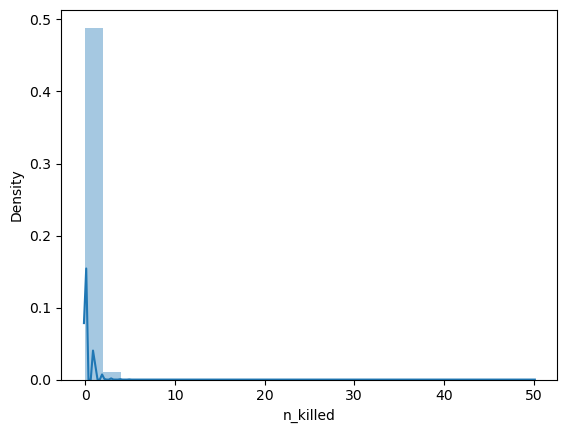

In [50]:
sns.distplot(df_gundeaths['n_killed'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [56]:
df_gundeaths['n_guns_involved'].mean() # Check the mean

1.3724416299402395

In [58]:
df_gundeaths['n_killed'].mean() # Check the mean

0.25228953967214207

In [60]:
df_gundeaths['n_guns_involved'].median() # Check the median

1.0

In [68]:
df_gundeaths['n_killed'].median() # Check the median

0.0

In [66]:
df_gundeaths['n_guns_involved'].max() # Check the max

400.0

In [70]:
df_gundeaths['n_killed'].max() # Check the max

50

# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_gundeaths['n_guns_involved'].values.reshape(-1,1)
y = df_gundeaths['n_killed'].values.reshape(-1,1)

In [40]:
X

array([[1.37244163],
       [1.37244163],
       [2.        ],
       ...,
       [1.        ],
       [1.        ],
       [2.        ]])

In [42]:
y

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [2]])

In [44]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [75]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [77]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [79]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

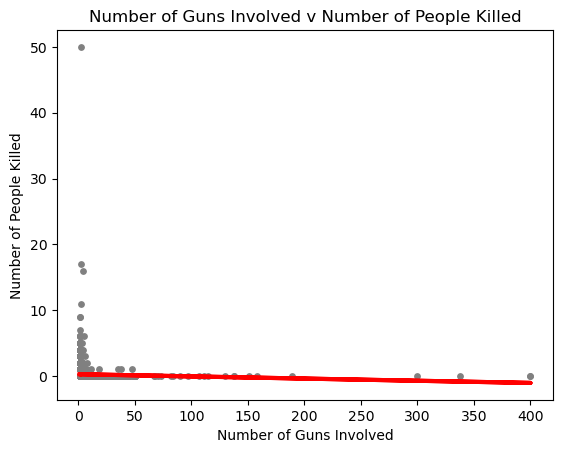

In [97]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Guns Involved v Number of People Killed')
plot_test.xlabel('Number of Guns Involved')
plot_test.ylabel('Number of People Killed')
plot_test.show()

In [83]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [85]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00330335]]
Mean squared error:  0.30351408654345896
R2 score:  0.0003492862565128707


In [87]:
y_predicted

array([[0.25102277],
       [0.25225308],
       [0.25102277],
       ...,
       [0.25102277],
       [0.25102277],
       [0.25225308]])

In [89]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.251023
1,4,0.252253
2,0,0.251023
3,0,0.251023
4,0,0.252253
5,0,0.252253
6,0,0.252253
7,1,0.252253
8,0,0.252253
9,0,0.251023


In [91]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [93]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [95]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00330335]]
Mean squared error:  0.25866230446019306
R2 score:  0.0005432949570450818


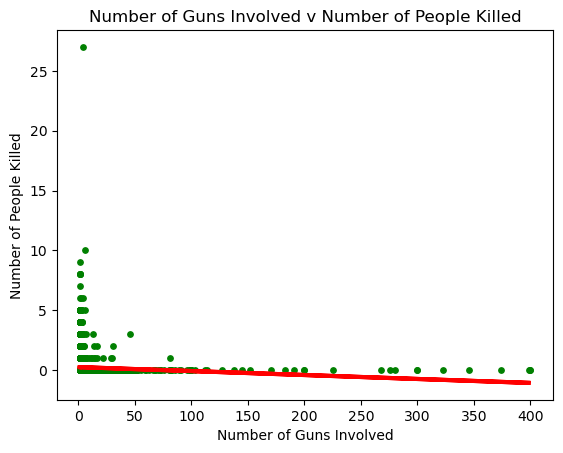

In [99]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of Guns Involved v Number of People Killed')
plot_test.xlabel('Number of Guns Involved')
plot_test.ylabel('Number of People Killed')
plot_test.show()

# Reviewing Performance After Removing Outliers

In [110]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_gundeaths[df_gundeaths['n_killed'] <=40] 

In [112]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_gundeaths[df_gundeaths['n_guns_involved'] <=350] 

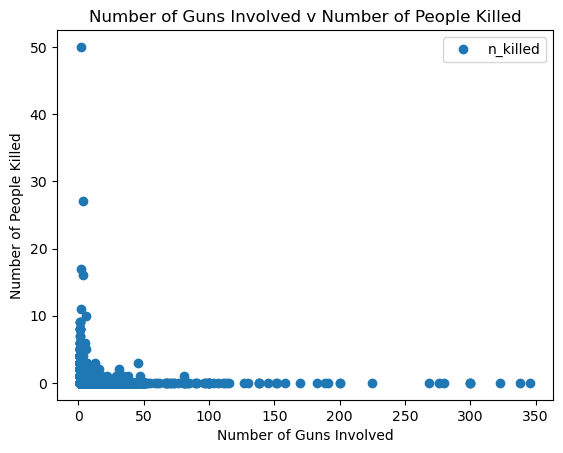

In [114]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'n_guns_involved', y='n_killed', style='o')  
plt.title('Number of Guns Involved v Number of People Killed')  
plt.xlabel('Number of Guns Involved')  
plt.ylabel('Number of People Killed')  
plt.show()

In [116]:
# Reshape again.

X_2 = df_test['n_guns_involved'].values.reshape(-1,1)
y_2 = df_test['n_killed'].values.reshape(-1,1)

In [118]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [120]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [122]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [124]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [126]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00435]]
Mean squared error:  0.2950244284532471
R2 score:  0.0005467773236911277


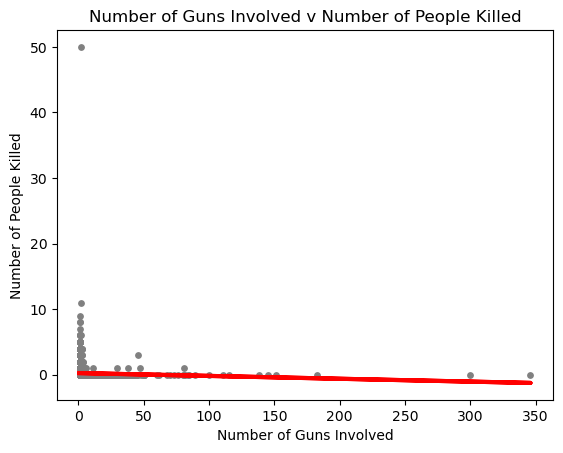

In [128]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Number of Guns Involved v Number of People Killed')
plot_test.xlabel('Number of Guns Involved')
plot_test.ylabel('Number of People Killed')
plot_test.show()

In [130]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.25383
1,1,0.25383
2,1,0.25383
3,0,0.25221
4,1,0.25383
5,0,0.25221
6,0,0.25221
7,1,0.25383
8,0,0.25221
9,0,0.25383
